In [16]:
import torch
import models
import logging
import utils
import data
import matplotlib.pyplot as plt
from os.path import join

from importlib import reload
reload(models)
reload(utils)
reload(data)

logger = logging.getLogger()

In [31]:
sweep_dir = "experiments"
exp = "first_try"
config_file = join(sweep_dir, exp, "config.yaml")
dsb = models.CachedDSB.from_config(config_file, logger)
n = 17
M = 5
dsb.load_model('beta', n, ema=False)
X = dsb.generate_path('alpha', M=M, remove_last_noise=True).cpu()

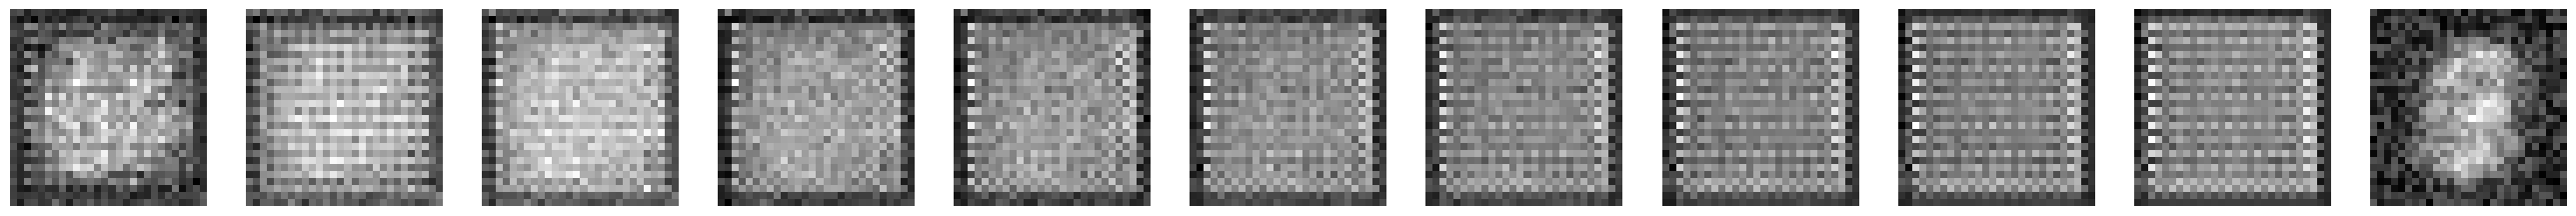

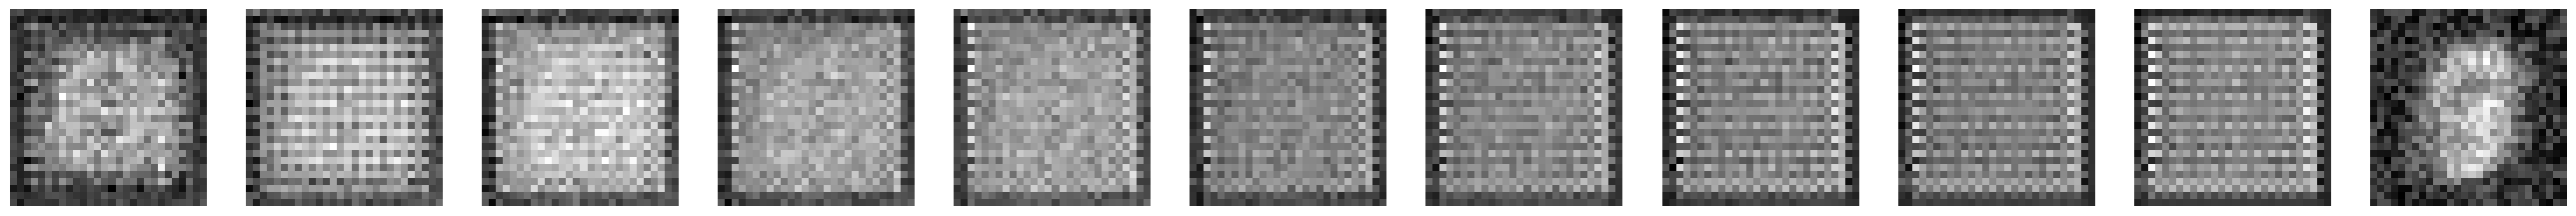

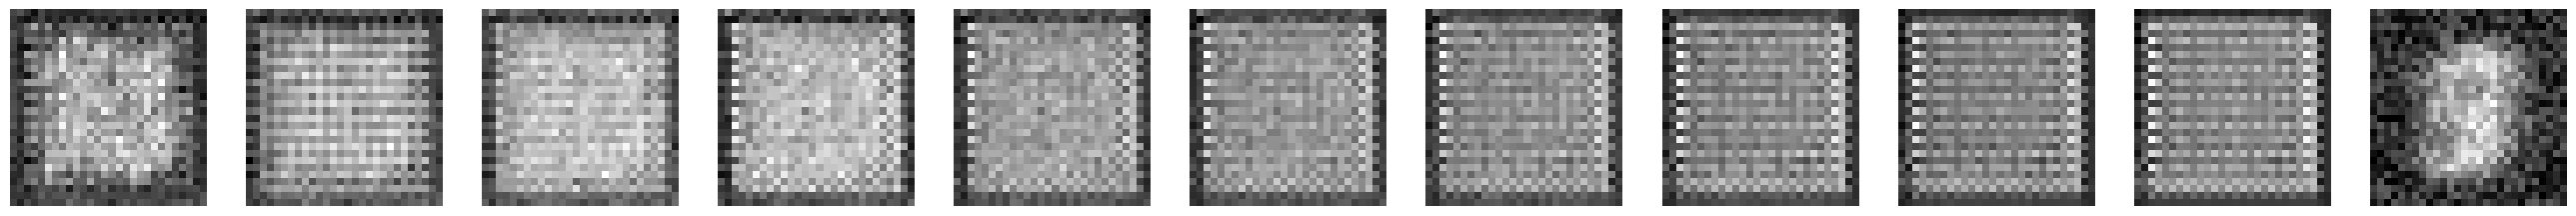

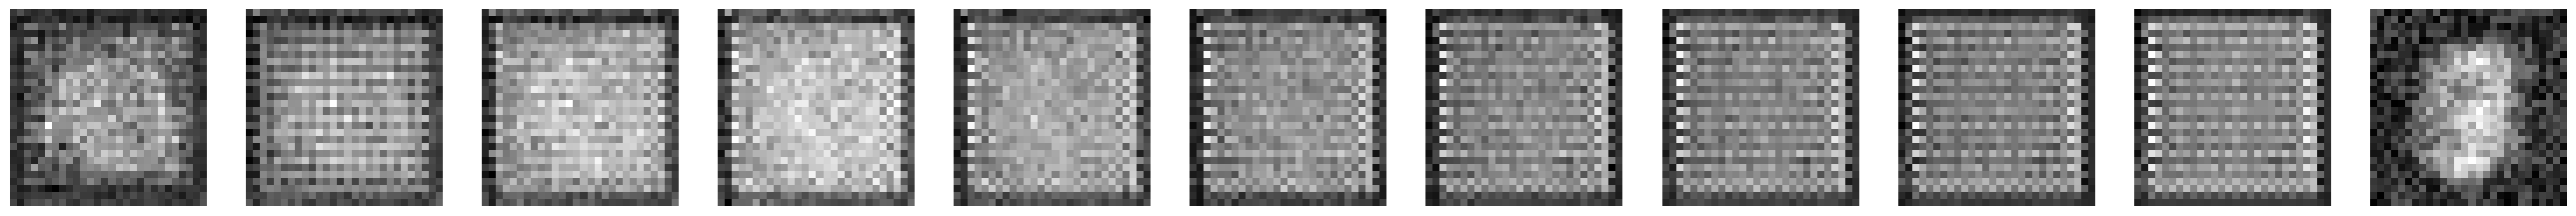

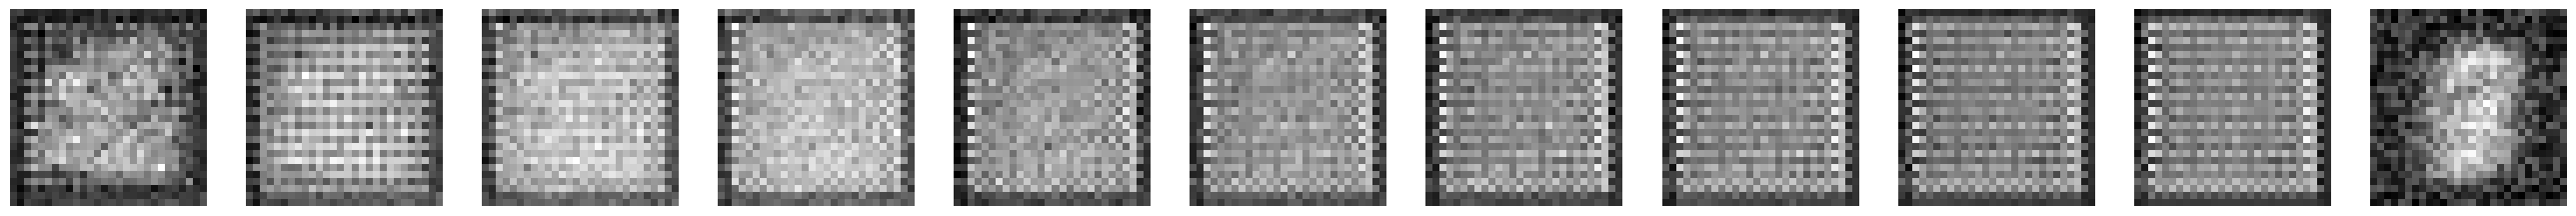

In [32]:
for i in range(M):
    utils.plot_image(X[:,i])

In [ ]:
X = dsb.generate_path('beta', M=M, remove_last_noise=True)
path = X[:,0]



34.0 kB


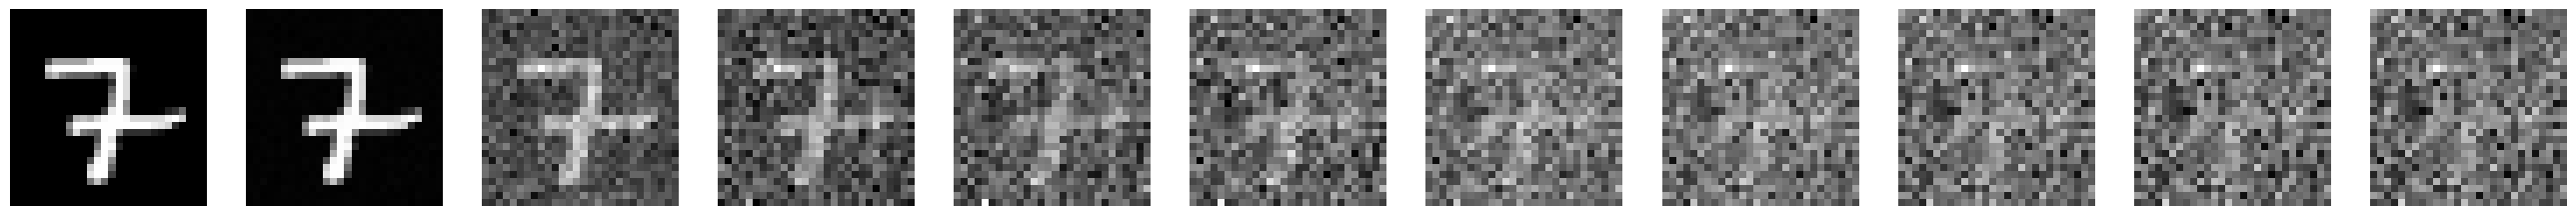

In [156]:
dsb.load_model('alpha', n, ema=False)
X_forward = dsb.generate_path('beta', M=M, remove_last_noise=True).cpu()
example = X_forward[:,0]
utils.plot_image(example)

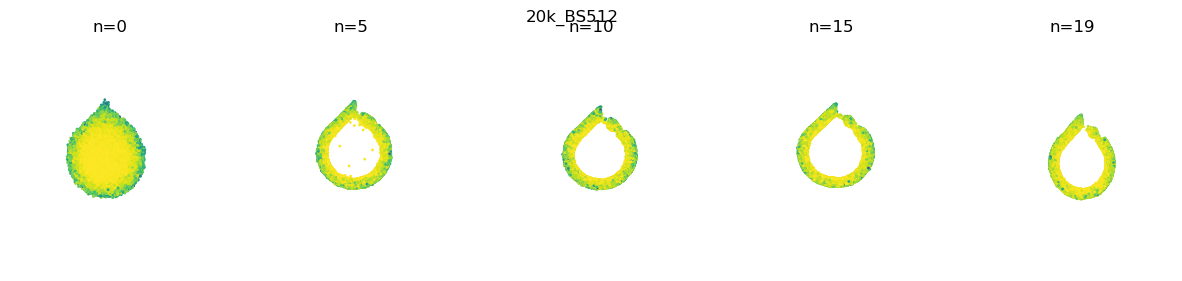

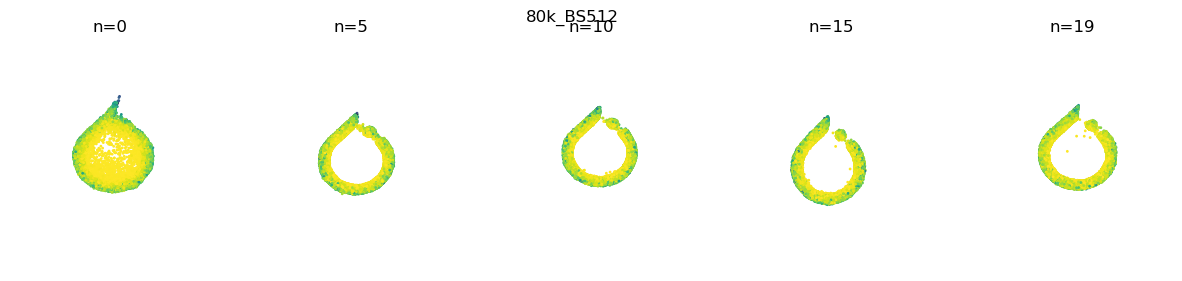

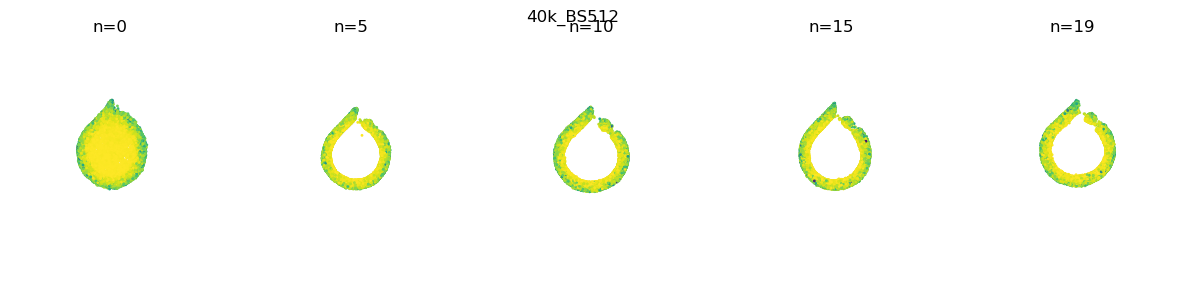

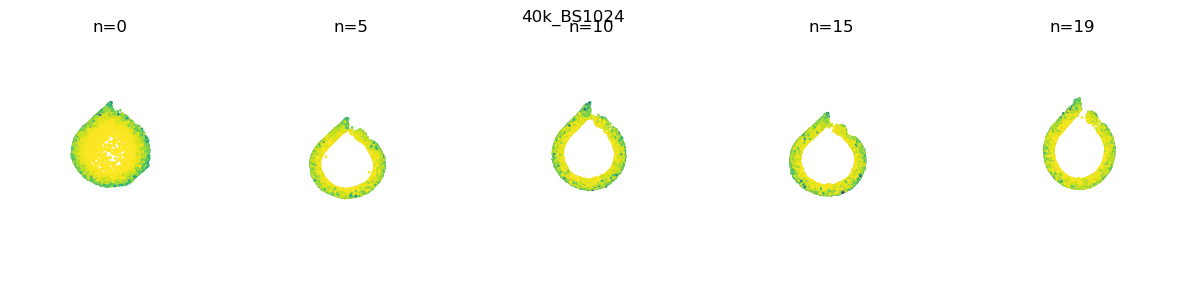

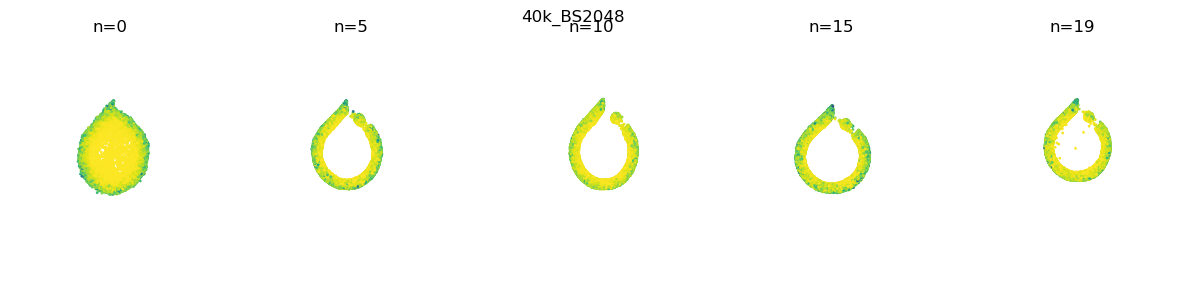

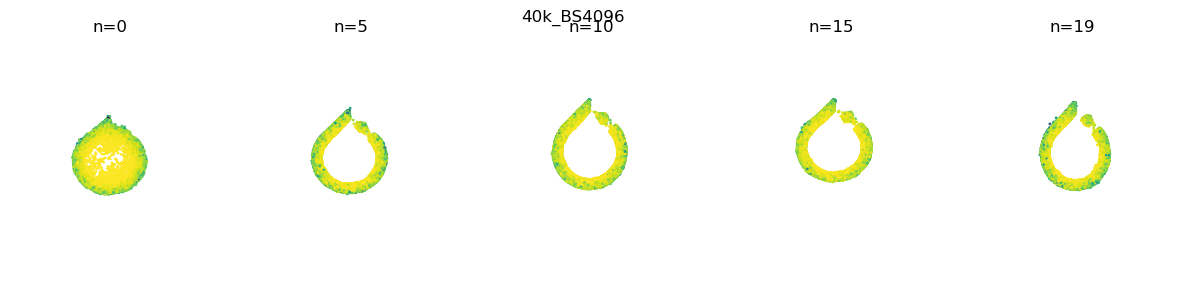

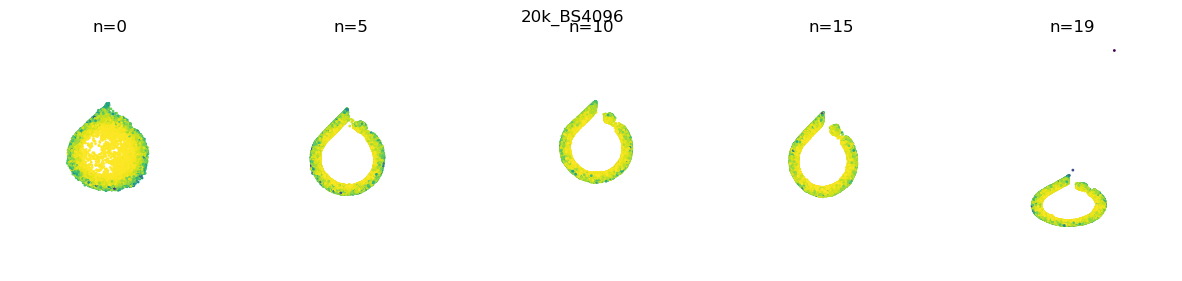

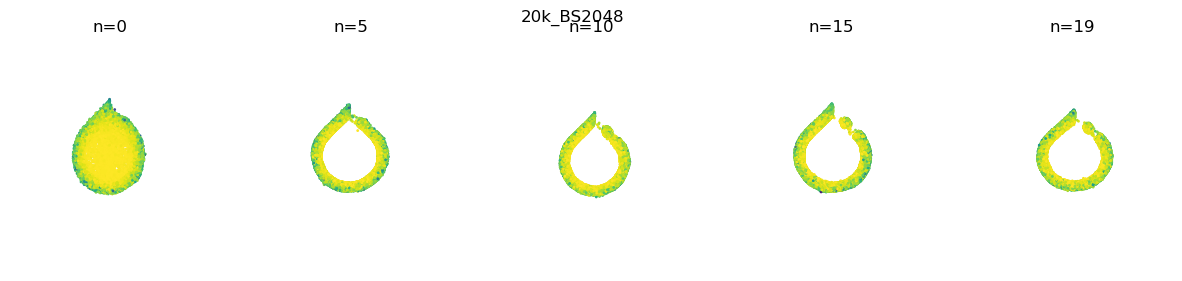

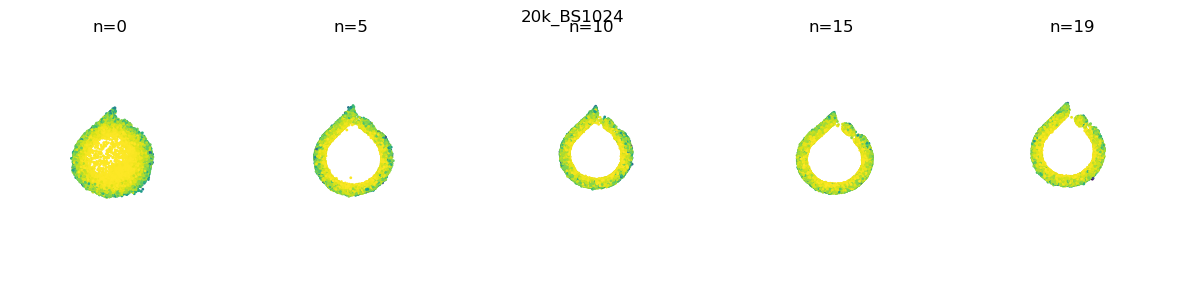

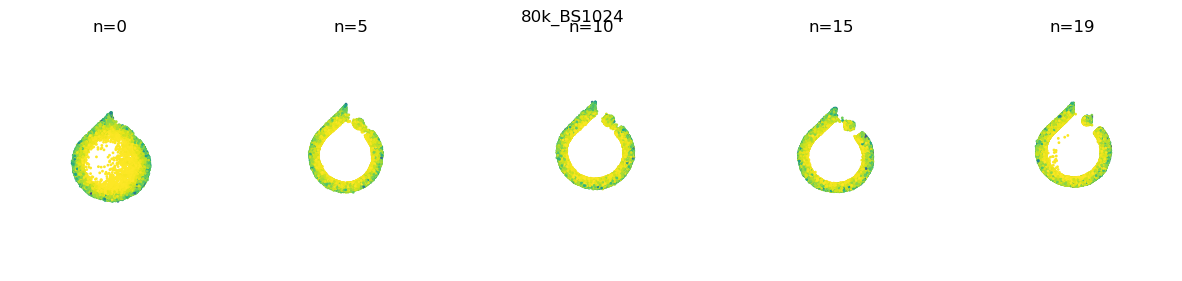

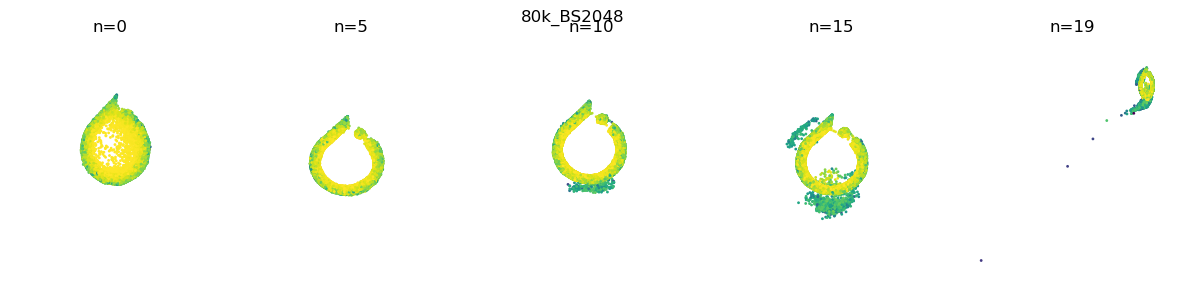

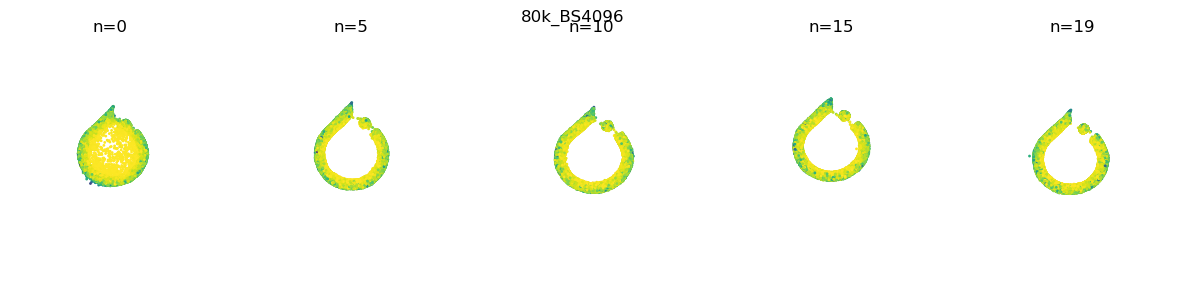

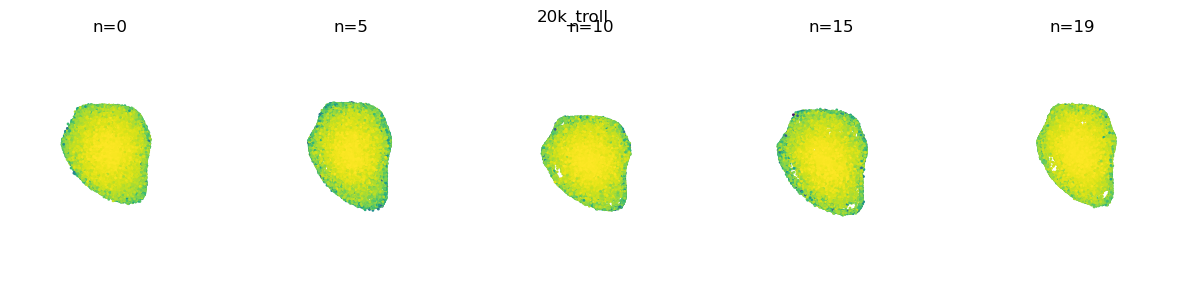

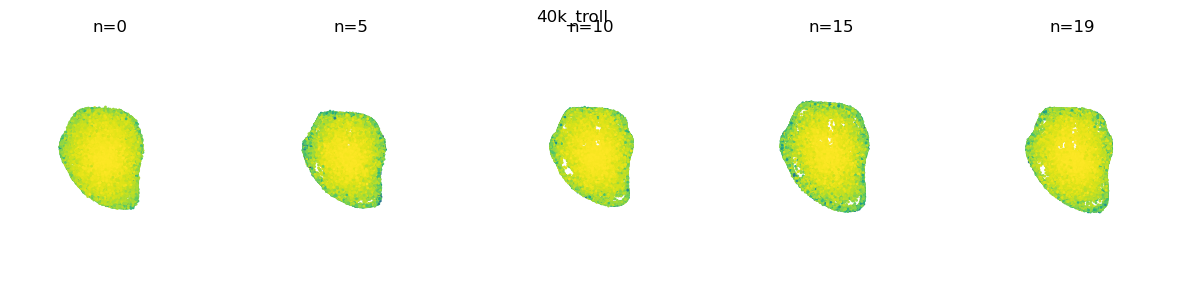

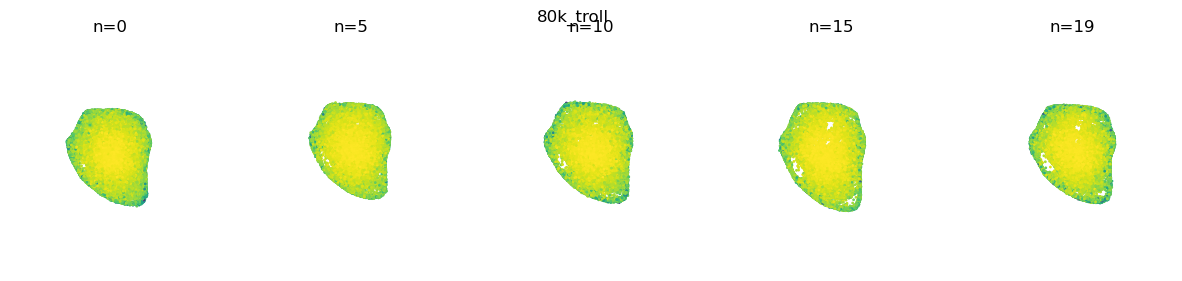

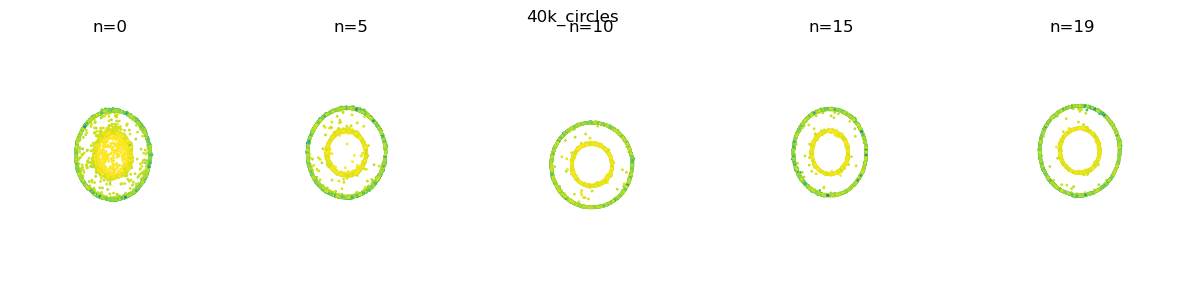

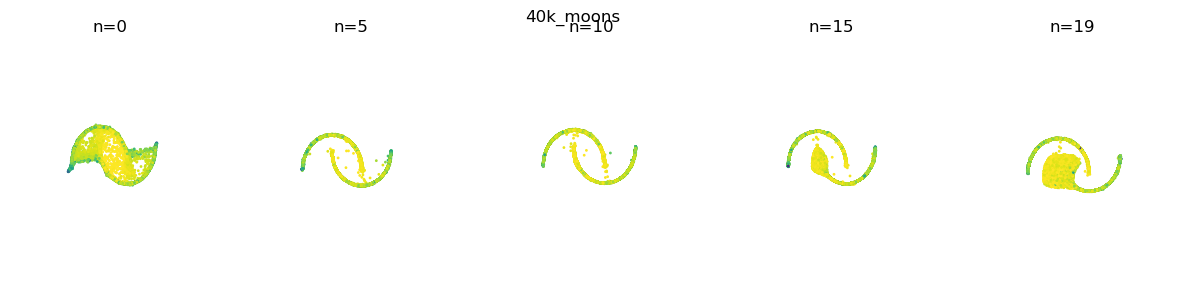

In [82]:
sweep_dir = "sweeps/sweep9"
M = 50_000
list_n = [0, 5, 10, 15, 19]
utils.plot_sweep(sweep_dir, list_n, logger, M=M, reverse=True, ema=False, remove_last_noise=True)

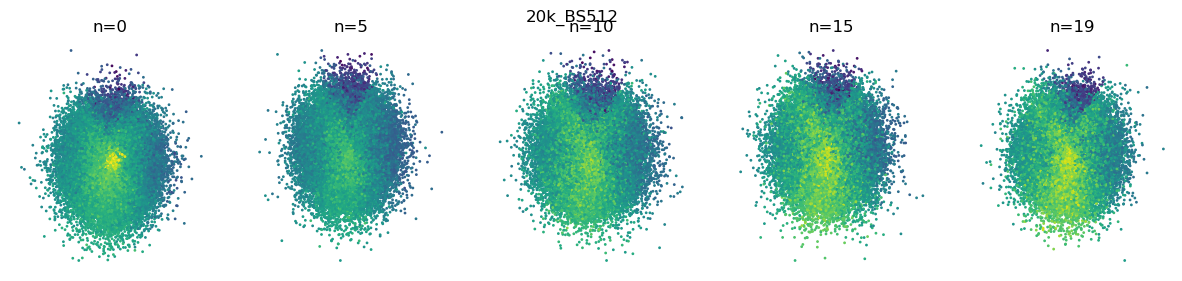

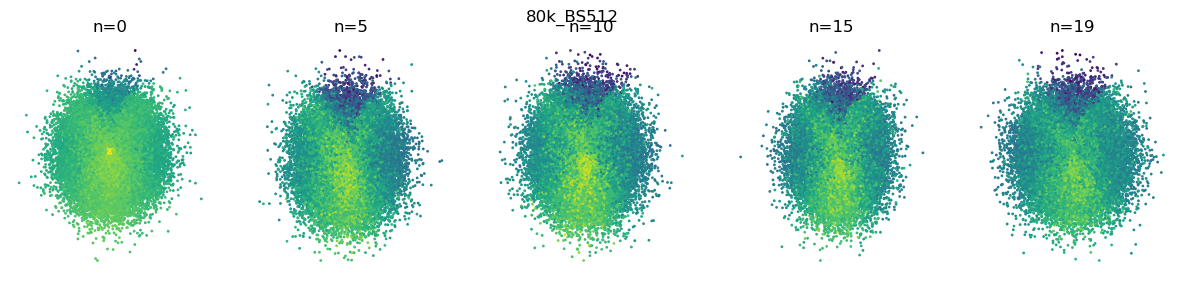

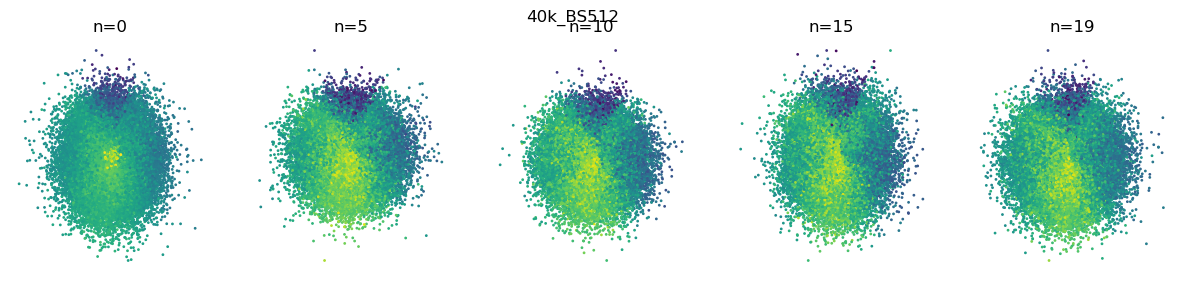

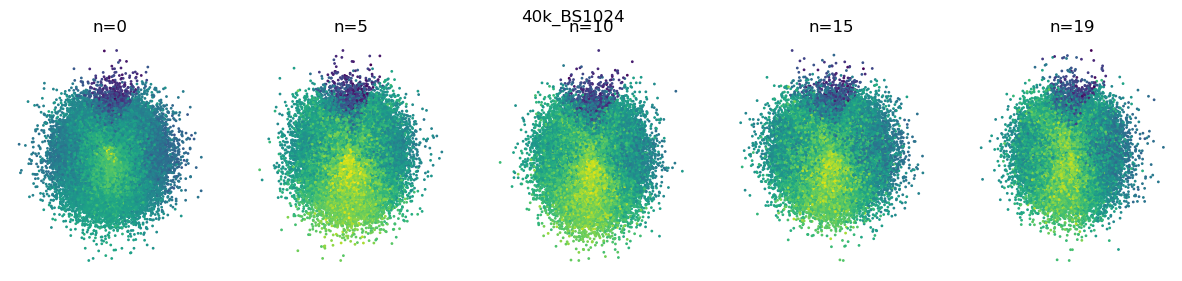

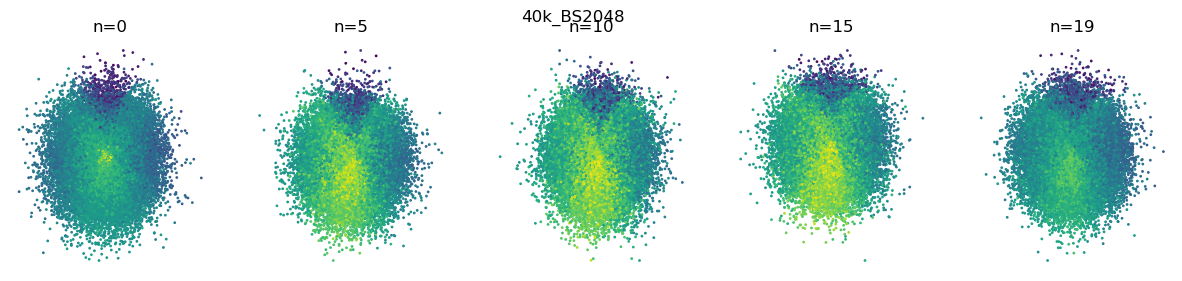

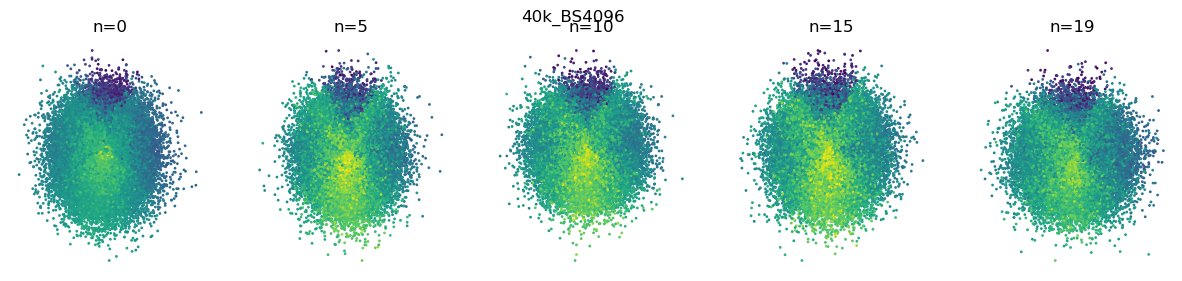

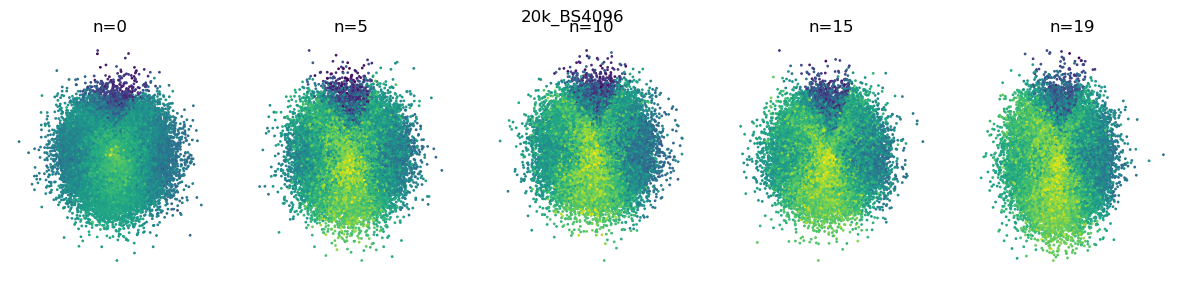

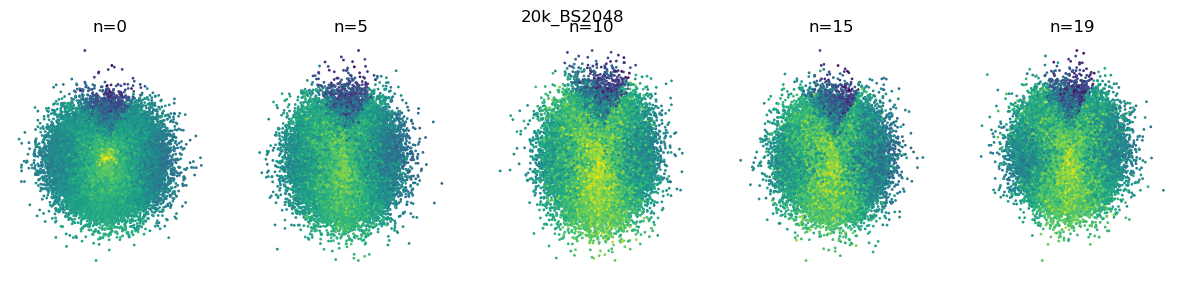

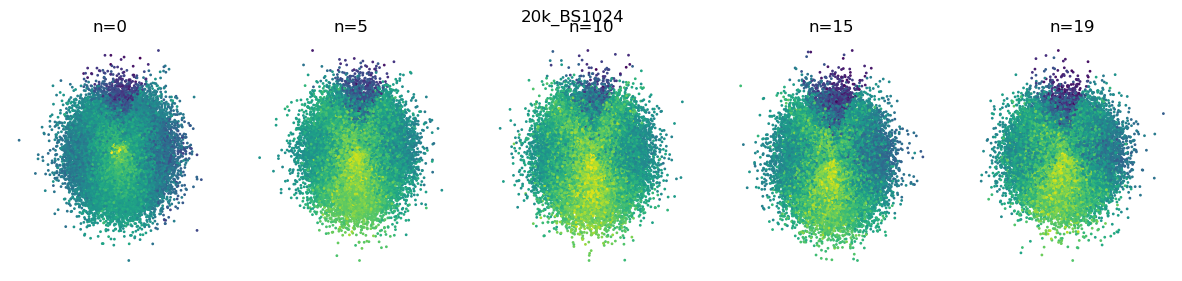

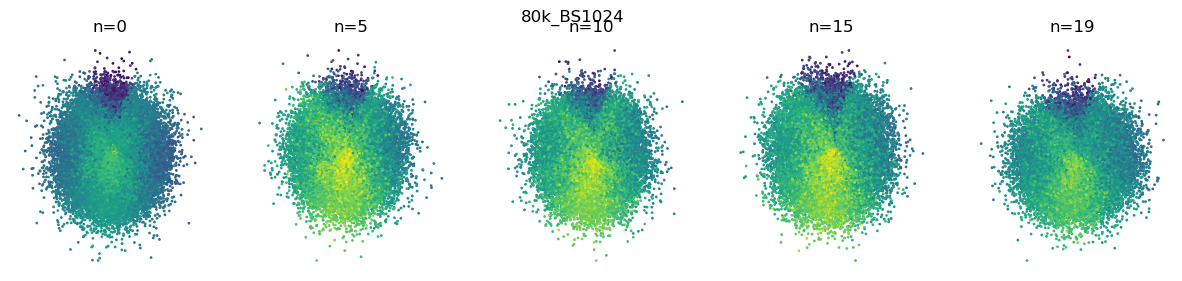

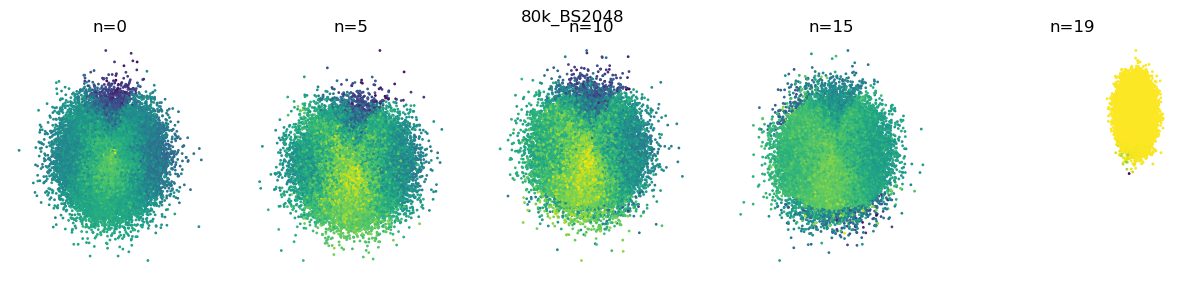

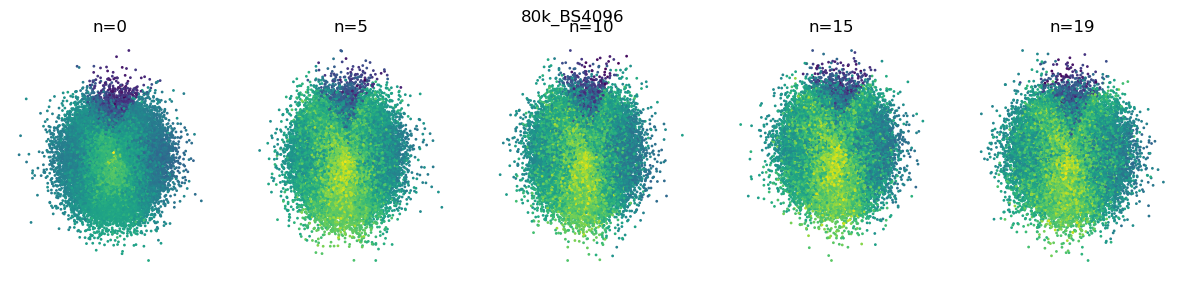

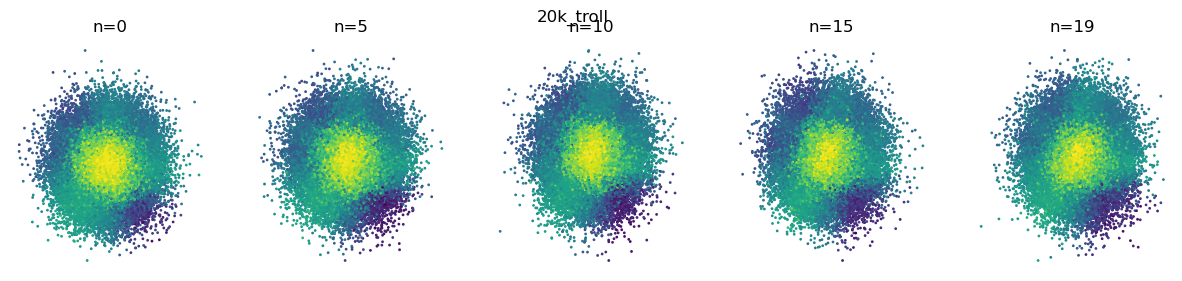

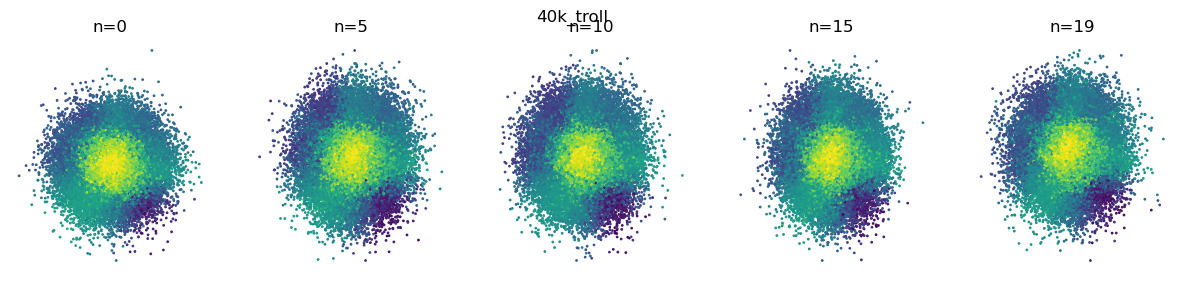

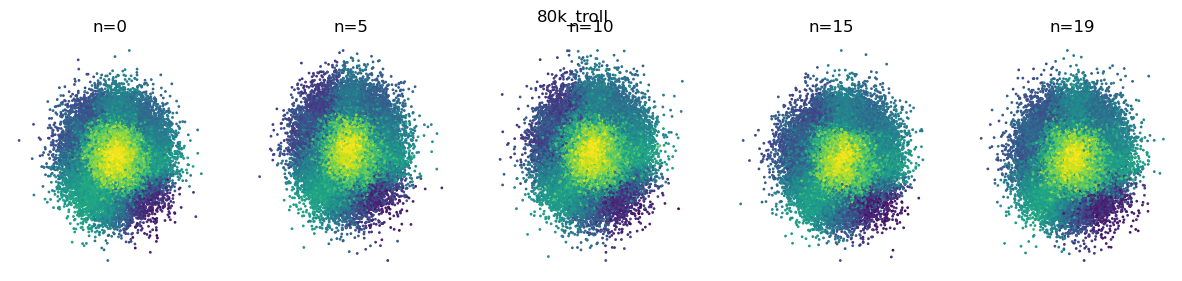

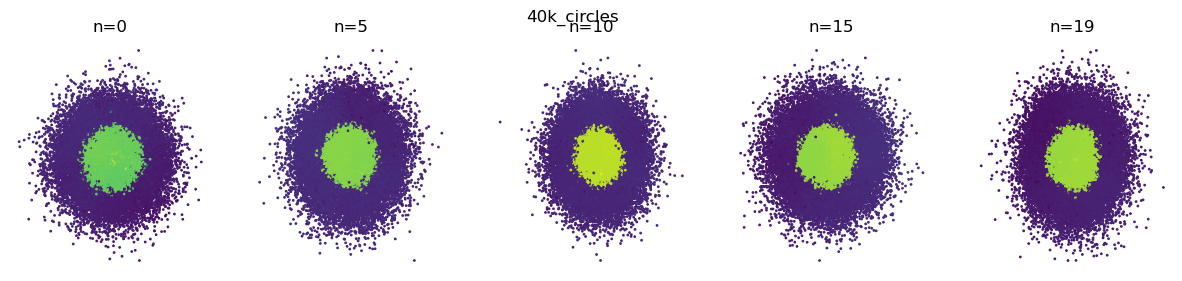

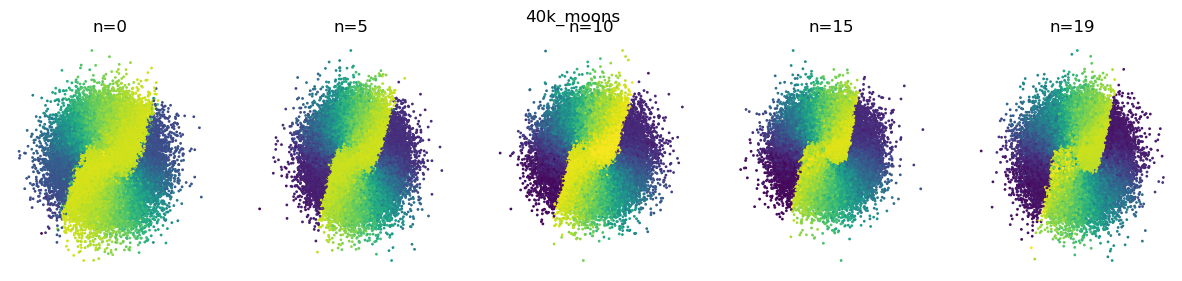

In [84]:
sweep_dir = "sweeps/sweep9"
M = 50_000
list_n = [0, 5, 10, 15, 19]
utils.plot_sweep(sweep_dir, list_n, logger, M=M, reverse=False, ema=False, remove_last_noise=True)

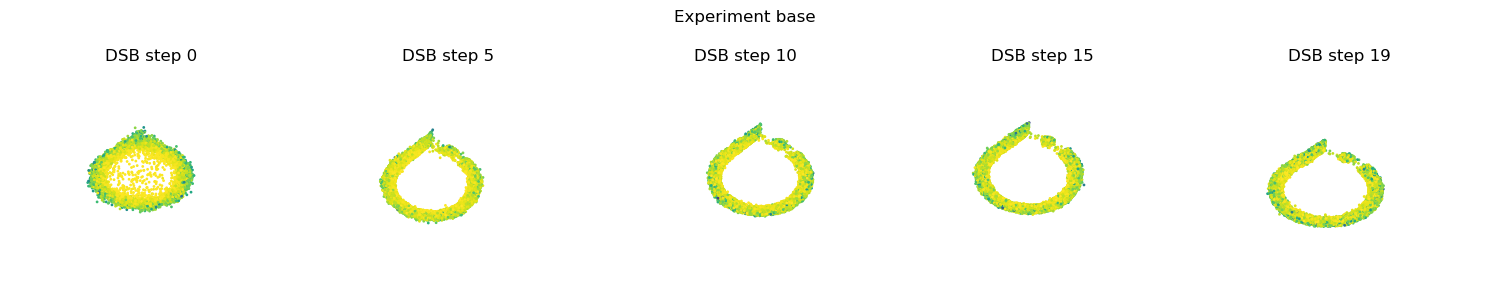

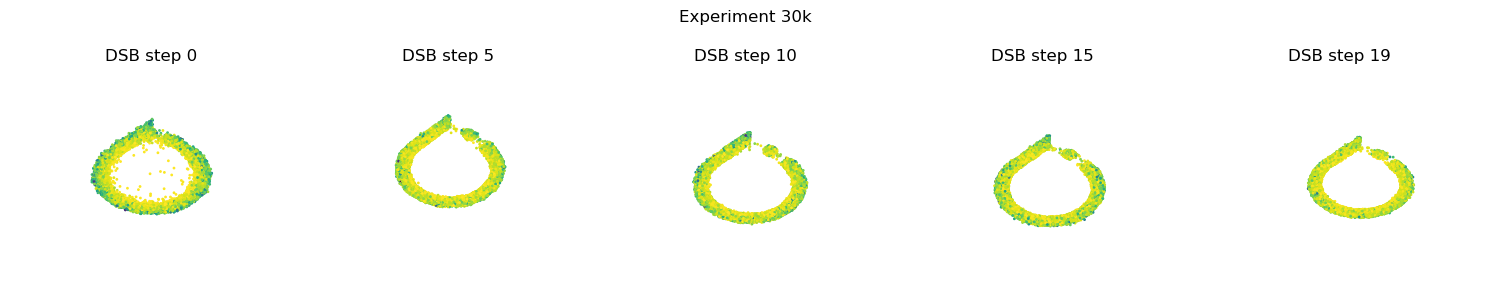

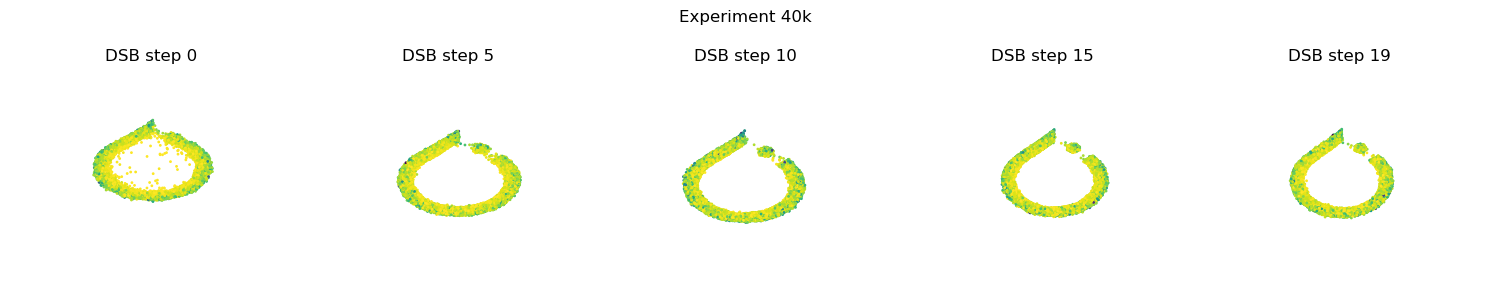

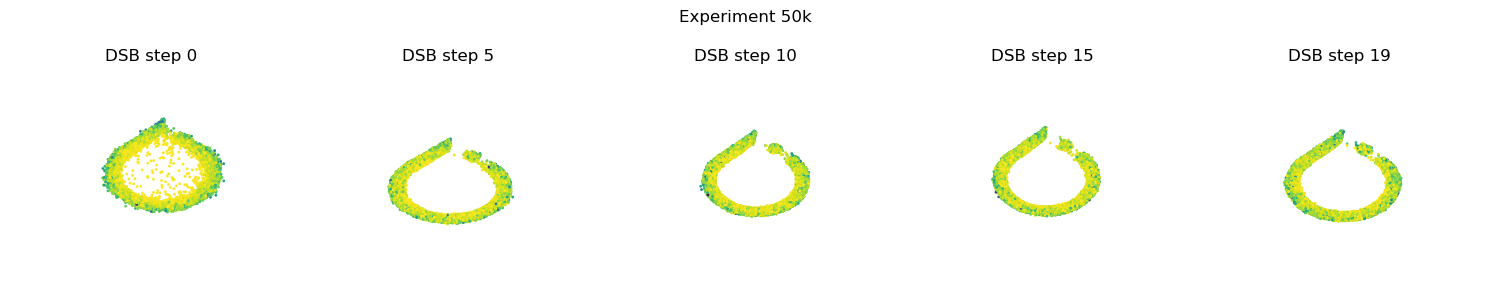

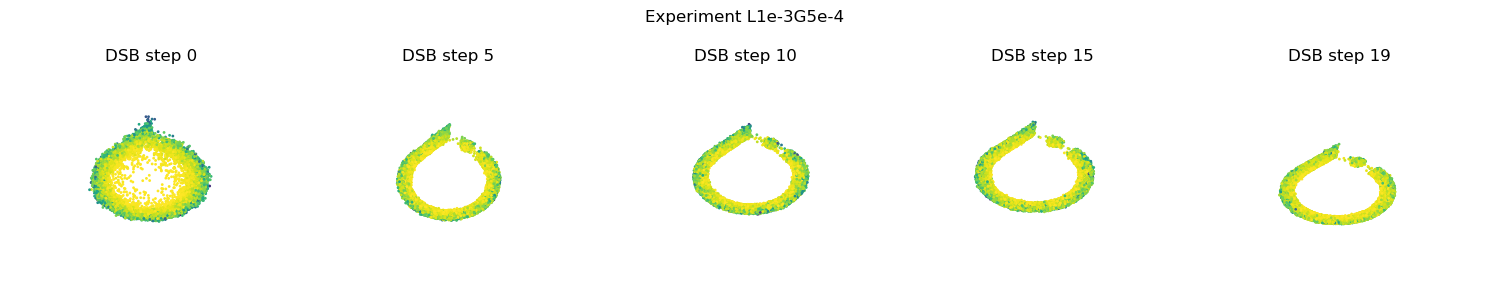

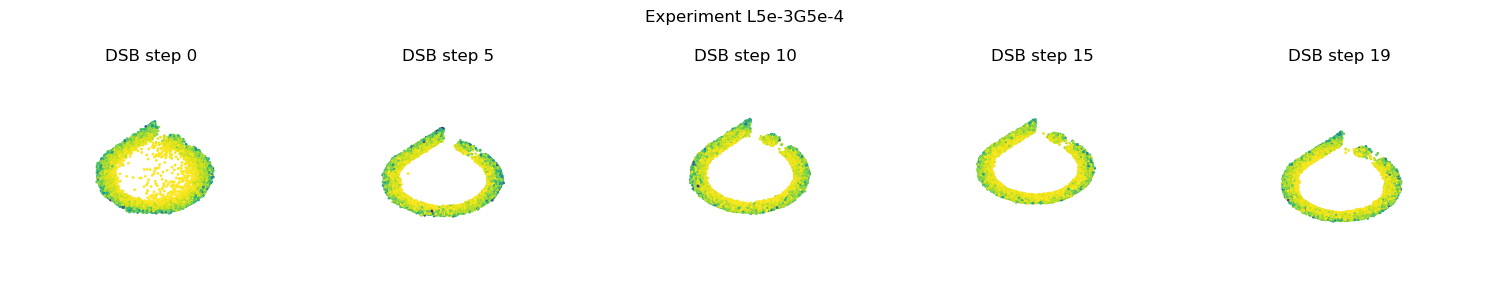

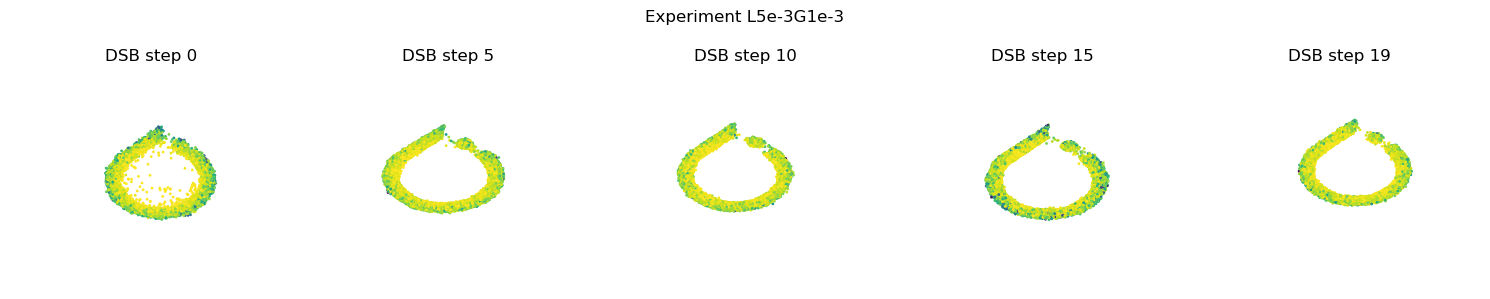

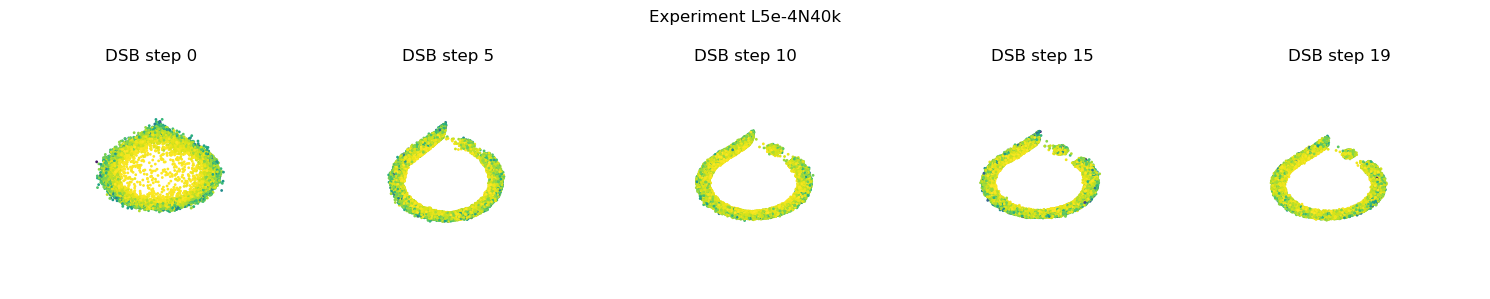

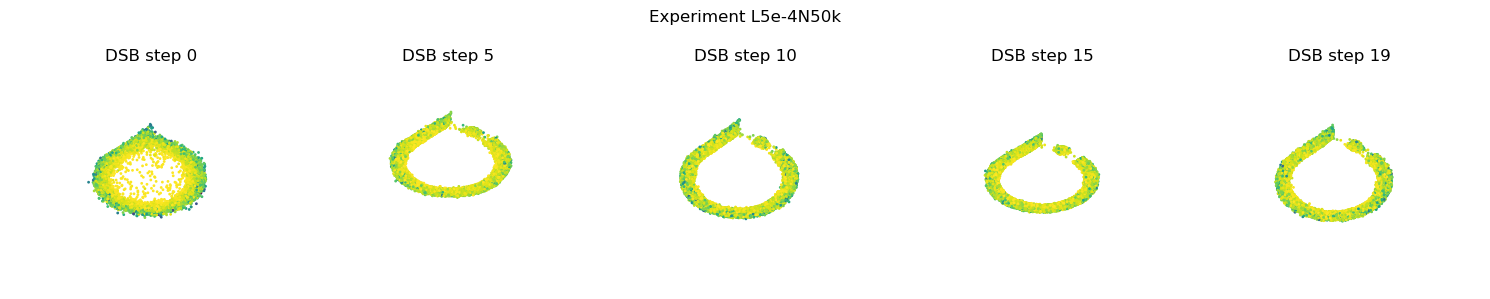

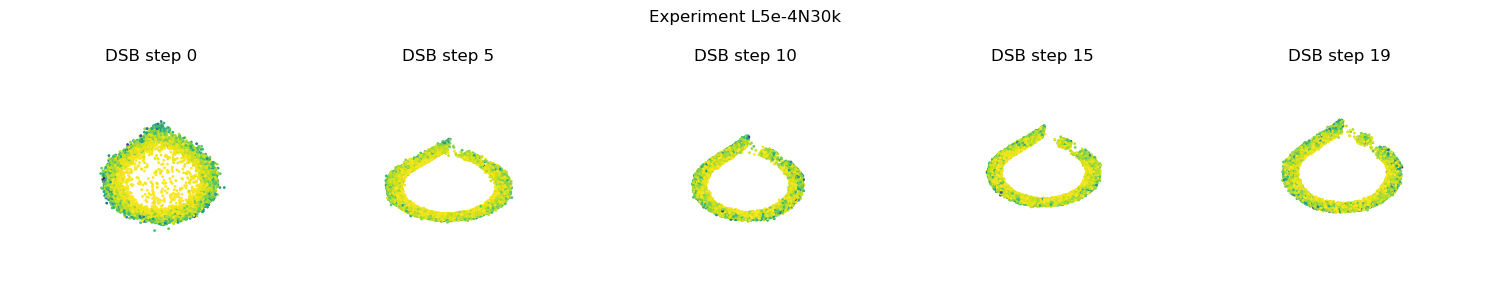

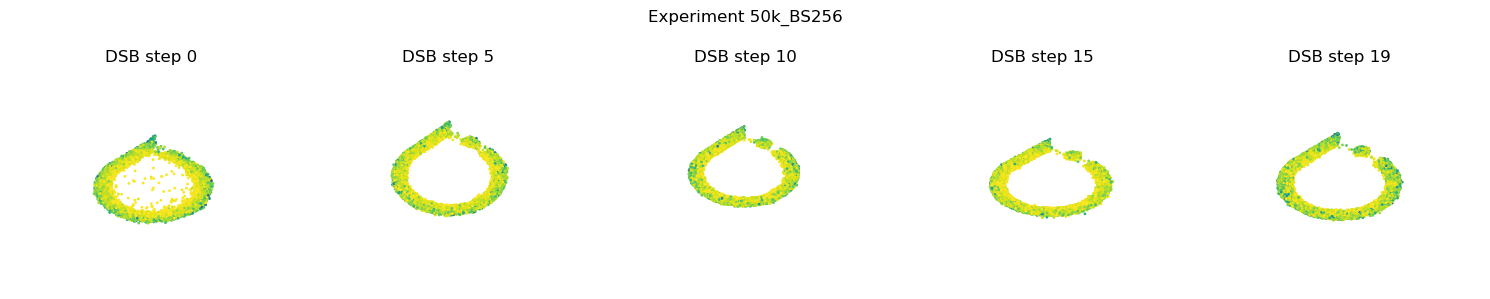

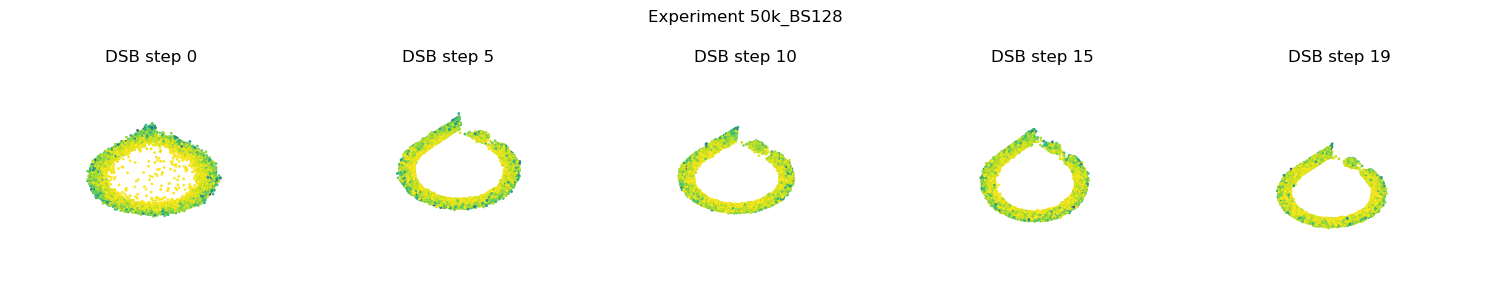

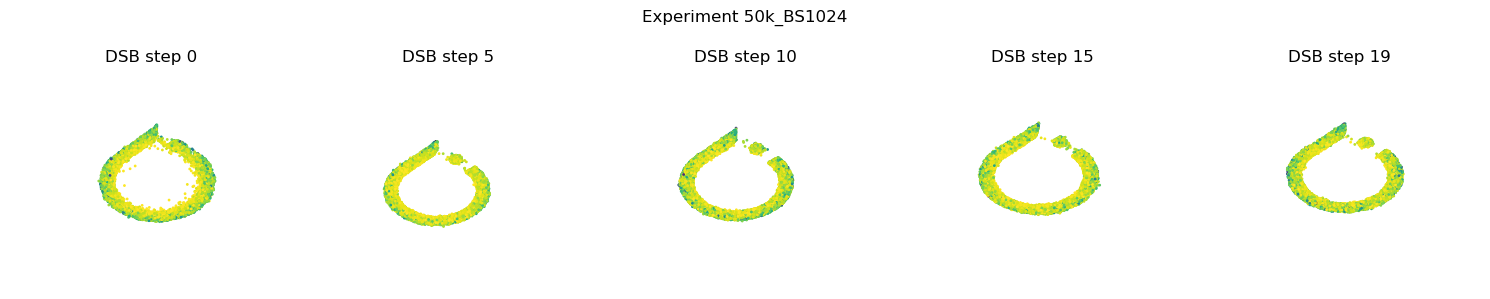

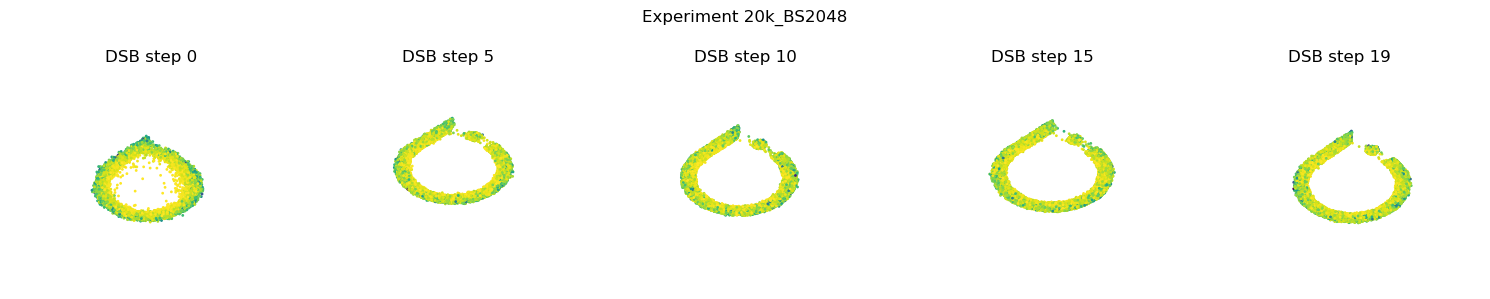

In [22]:
sweep_dir = "sweeps/sweep7"
M = 10_000
list_n = [0, 5, 10, 15, 19]
utils.plot_sweep(sweep_dir, list_n, logger, M=M, reverse=True, ema=True, remove_last_noise=True)

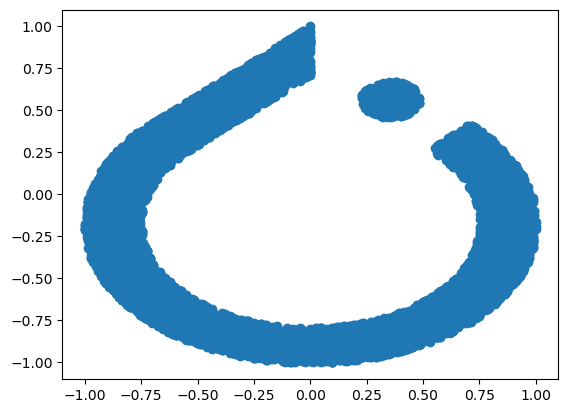

In [11]:
dsb.load_model('alpha', n, ema=False)
# X = dsb.generate_path('beta', M=M, remove_last_noise=True).cpu()
# utils.plot_bridge(X, reverse=False)

s = dsb.pdata.sample(10000)
plt.scatter(*s.T)